# **SEABORN LIBRARY**

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

Here is some of the functionality that seaborn offers:

- A dataset-oriented API for examining relationships between multiple variables

- Specialized support for using categorical variables to show observations or aggregate statistics

- Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data

- Automatic estimation and plotting of linear regression models for different kinds dependent variables

- Convenient views onto the overall structure of complex datasets

- High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations

- Concise control over matplotlib figure styling with several built-in themes

- Tools for choosing color palettes that faithfully reveal patterns in your data

Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

In [8]:
# FIRST OF ALL LET'S IMPORT ALL THE LIBRARIES..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# sns provides many builtin datasets to use and those datasets can be accessed by
# sns.load_dataset('dataset_name')

df = sns.load_dataset('tips')     # now df is our dataframe instance
df.head()
# to see first five rows of the dataset.. you can even specify no. of rows under parenthesis

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
# dataframe.info() mehtod is useful to know multiple things about data
# like total columns, rows, column names, data types of each column and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
# dataframe.describe() method is useful to get a statistical understanding of
# every column as it shows mainly the cental part of data, variability of data
# quartiles ranges of data
# note: only useful for numerical data

df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Let's see some of the plots now....

# **Relational Plots**

Relational plots are used for visualizing the statistical relationship between the data points. Visualization is necessary because it allows the human to see trends and patterns in the data. The process of understanding how the variables in the dataset relate each other and their relationships are termed as Statistical analysis.

Types:
1. scatter plot
2. line plot
3. combination of both to have more functionality rel plot

### **Scatter Plot**

definition: A graph in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.

<Axes: xlabel='total_bill', ylabel='tip'>

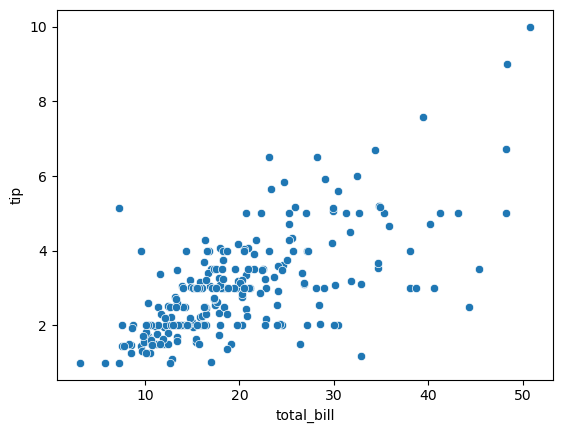

In [12]:
# let's take total_bill as independent quantity and tip as dependent and find some relation among them
# we will pass three parameters first we will pass data which is our dataframe instance
# next we will pass x and y values as column names in the form of strings
sns.scatterplot(data = df, x = 'total_bill', y = 'tip')

### like one conclusion can be drawn from above graph that for the total_bill in the
### range of 10 to something around 25 most of the customers paid their bill with tip

<Axes: xlabel='total_bill', ylabel='tip'>

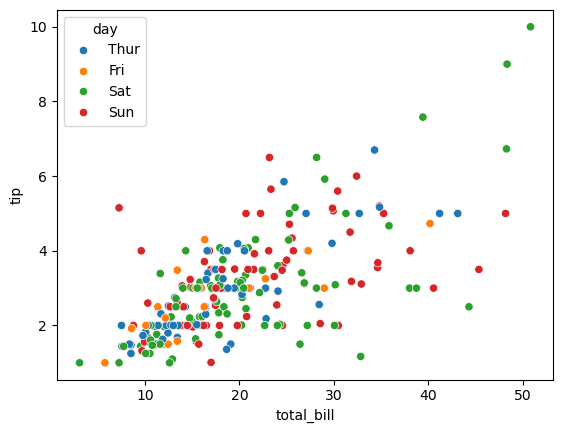

In [13]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'day')
# hue is a parameter that allows us to categorize data in more efficient way
# it accepts string as a value stands for column name

### **Line Plot**

definition: A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

<Axes: xlabel='total_bill', ylabel='tip'>

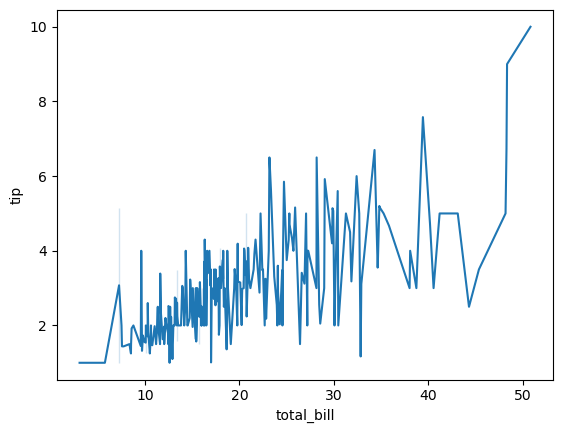

In [14]:
sns.lineplot(data = df, x = 'total_bill', y = 'tip')

<Axes: xlabel='total_bill', ylabel='tip'>

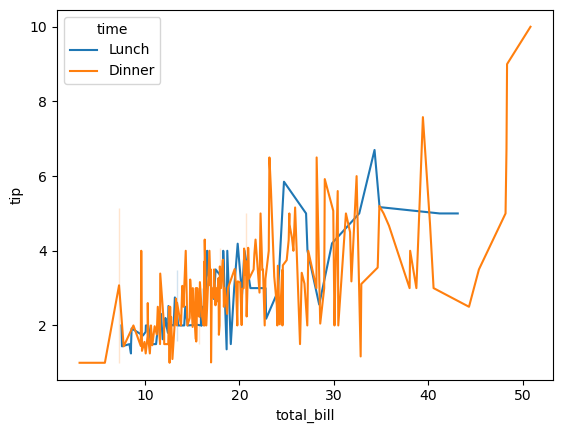

In [15]:
sns.lineplot(data = df, x = 'total_bill', y = 'tip', hue = 'time')

### **Rel Plot**

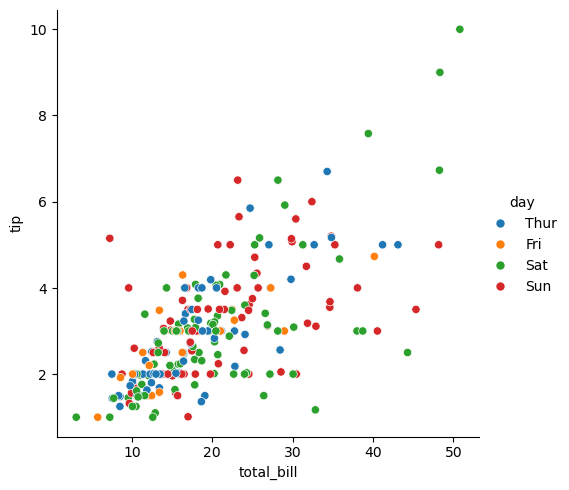

In [16]:
sns.relplot(data = df, x = 'total_bill', y = 'tip', hue = 'day', kind = 'scatter')

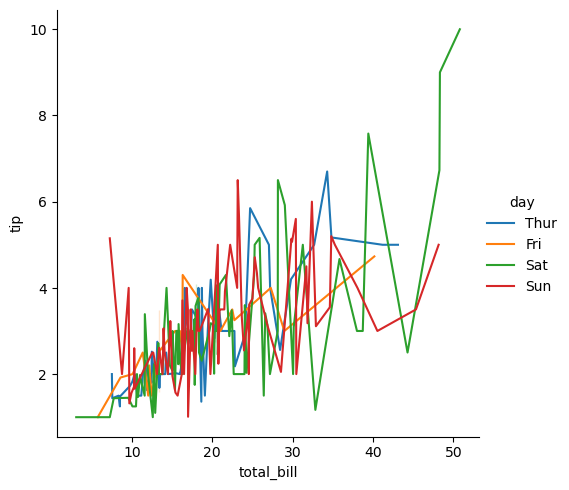

In [17]:
sns.relplot(data = df, x = 'total_bill', y = 'tip', hue = 'day', kind = 'line')

In [18]:
# dataframe.groupby() function allows us to order data in terms of some columns
# which gives us another dataframe and with the help of agg function we can
# specify list of statistical parameters we want

df.groupby('day').tip.agg(['count', 'sum', 'mean', 'std', 'max', 'min'])

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\1471157378.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').tip.agg(['count', 'sum', 'mean', 'std', 'max', 'min'])


,count,sum,mean,std,max,min
day,,,,,,
Thur,62,171.83,2.771452,1.240223,6.70,1.25
Fri,19,51.96,2.734737,1.019577,4.73,1.00
Sat,87,260.40,2.993103,1.631014,10.00,1.00
Sun,76,247.39,3.255132,1.234880,6.50,1.01


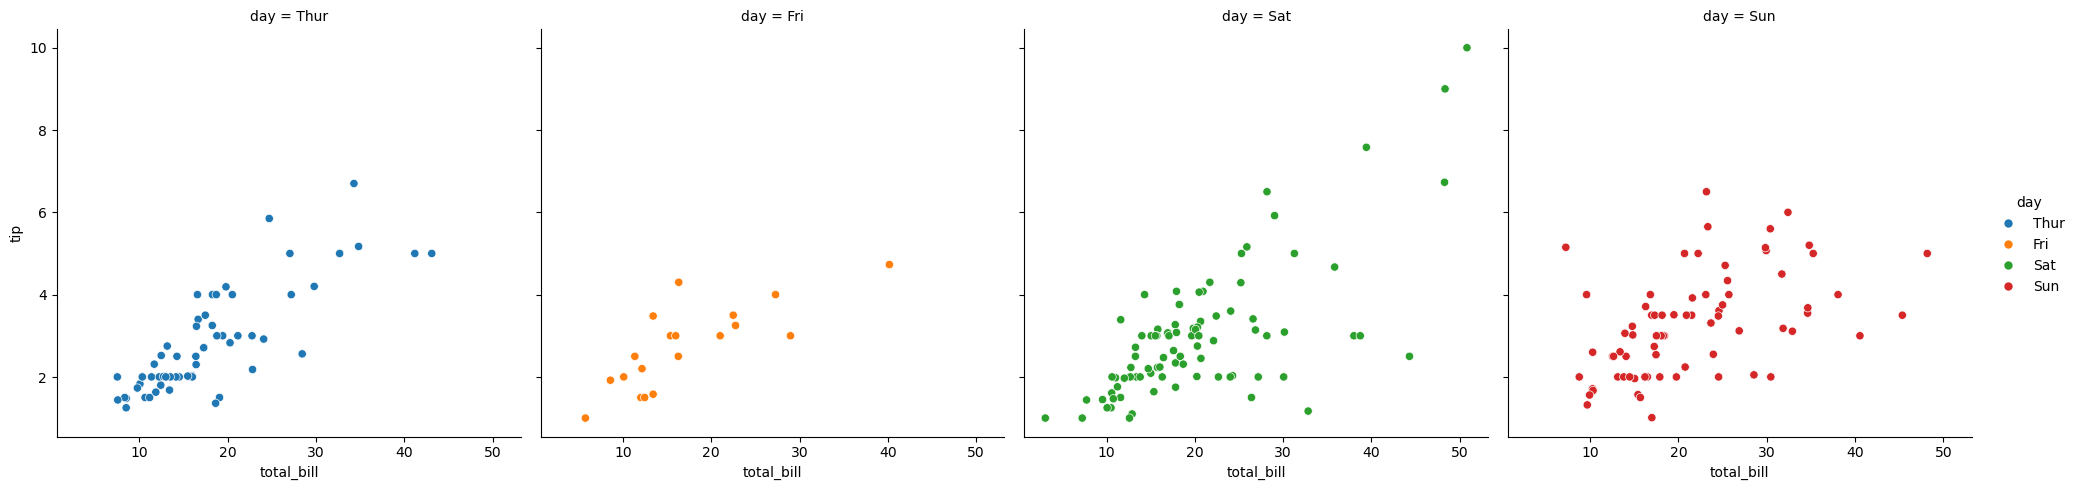

In [19]:
sns.relplot(data = df, x = 'total_bill', y = 'tip', hue = 'day', col = 'day')

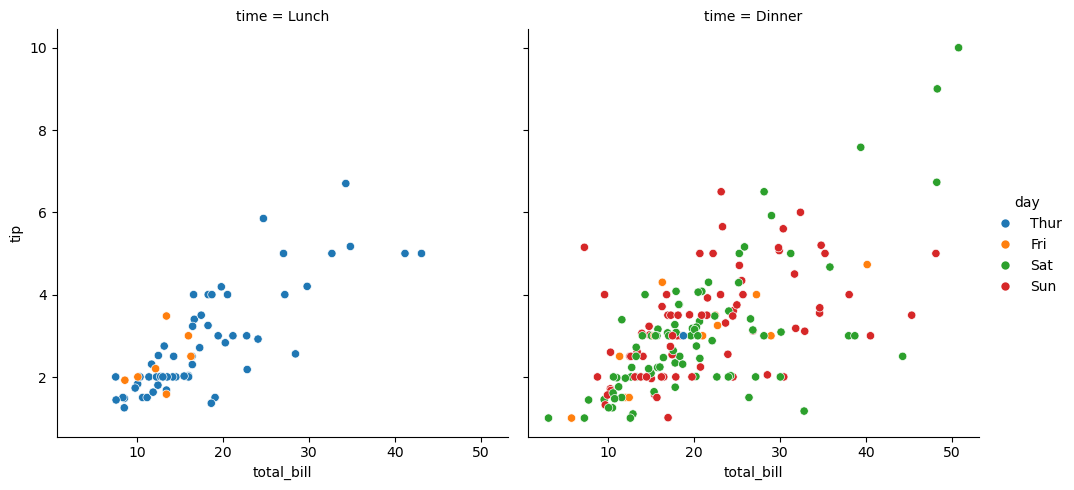

In [20]:
sns.relplot(data = df, x = 'total_bill', y = 'tip', hue = 'day', col = 'time')

In [21]:
# series.value_counts() function counts the unique values of a series

df.groupby('time').day.value_counts()

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\1784113065.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time').day.value_counts()


time    day 
Lunch   Thur    61
        Fri      7
        Sat      0
        Sun      0
Dinner  Sat     87
        Sun     76
        Fri     12
        Thur     1
Name: count, dtype: int64

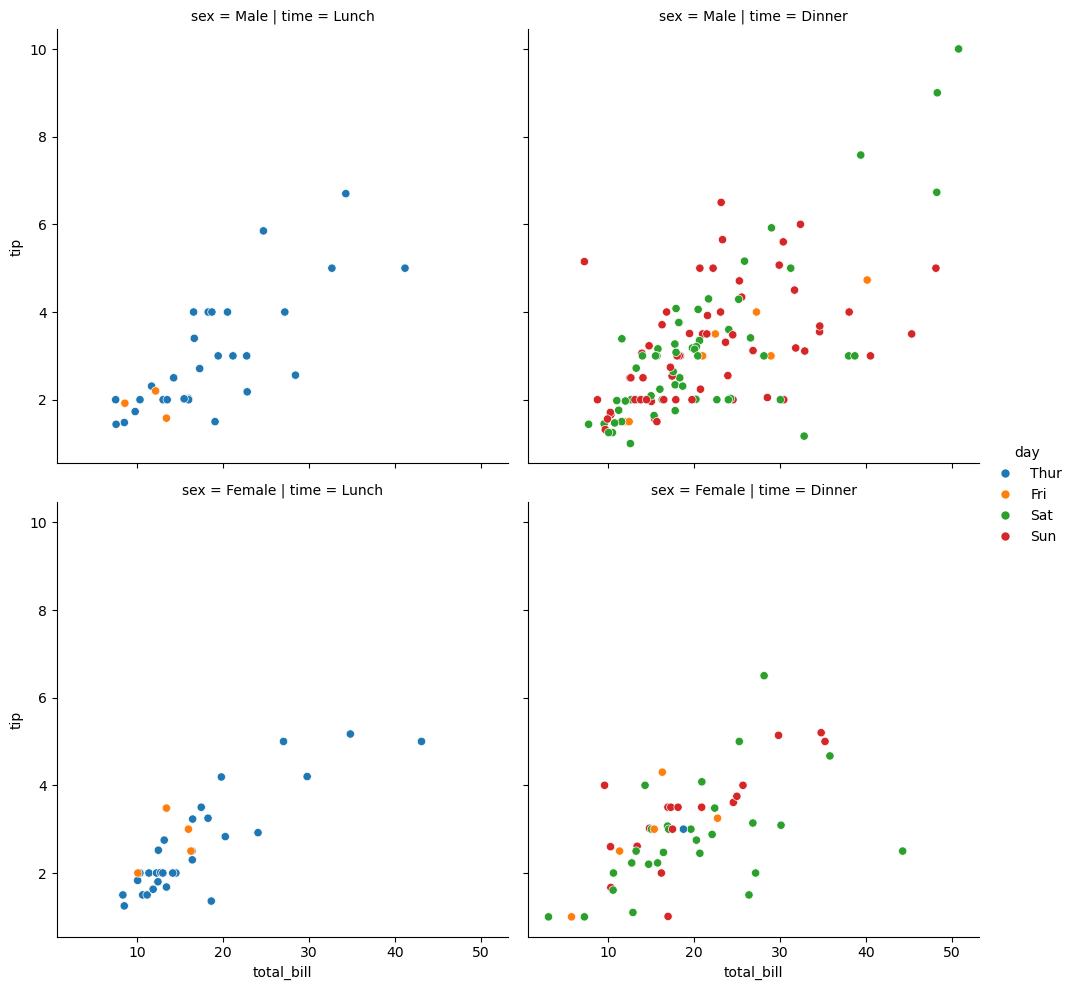

In [22]:
sns.relplot(data = df, x = 'total_bill', y = 'tip', col = 'time', hue = 'day', row = 'sex')

In [23]:
df.groupby(['time', 'sex']).day.value_counts()

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\3072805467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['time', 'sex']).day.value_counts()


time    sex     day 
Lunch   Male    Thur    30
                Fri      3
                Sat      0
                Sun      0
        Female  Thur    31
                Fri      4
                Sat      0
                Sun      0
Dinner  Male    Sat     59
                Sun     58
                Fri      7
                Thur     0
        Female  Sat     28
                Sun     18
                Fri      5
                Thur     1
Name: count, dtype: int64

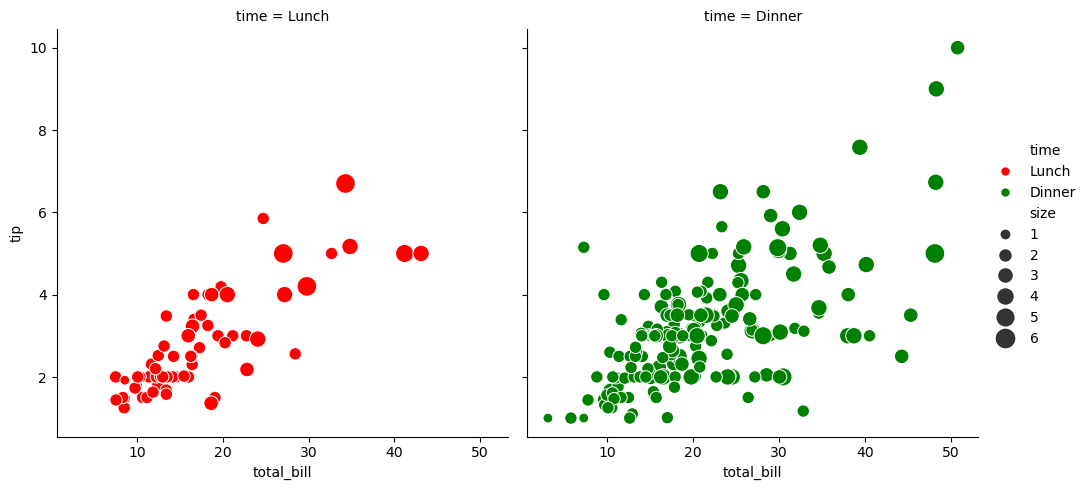

In [24]:
sns.relplot(data = df, x = 'total_bill', y = 'tip', col = 'time', size = 'size',
            hue = 'time', sizes = (50, 200), palette = ['red', 'green'])

# **Categorical Plots**

types:
1. stripplot
2. swarmplot
3. boxplot
4. violinplot
5. boxenplot
6. barplot
7. countplot
8. pointplot
9. combination of evrything catplot

note: here we will learn some of the imp plots

### **Strip Plot**

definition: A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of: Horizontal axis = the value of the response variable; ... It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).

<Axes: xlabel='total_bill'>

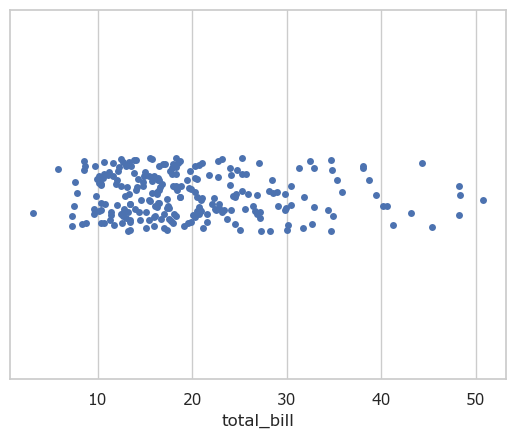

In [25]:
# following method is useful to set a particular plot style
sns.set(style = 'whitegrid', font = 'verdana')
sns.stripplot(data = df, x = 'total_bill')

## Example of `pd.cut`

In [26]:
import pandas as pd

# Example data
data = [1, 7, 5, 12, 18, 21, 30]

# Cut into bins with specified edges
categories = pd.cut(data, bins=[0, 10, 20, 30], labels=["Low", "Medium", "High"])

categories

['Low', 'Low', 'Low', 'Medium', 'Medium', 'High', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [27]:
# this is called data analysis for the above graph

df.groupby(pd.cut(df.total_bill, bins = [0, 10, 20, 30, 40, 50, 60], labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'],
                  right = True)).sex.value_counts().unstack().fillna(0)

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\1792381182.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df.total_bill, bins = [0, 10, 20, 30, 40, 50, 60], labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'],


sex,Male,Female
total_bill,,
0-10,11,6
10-20,76,54
20-30,45,20
30-40,17,5
40-50,7,2
50-60,1,0


<Axes: xlabel='day', ylabel='total_bill'>

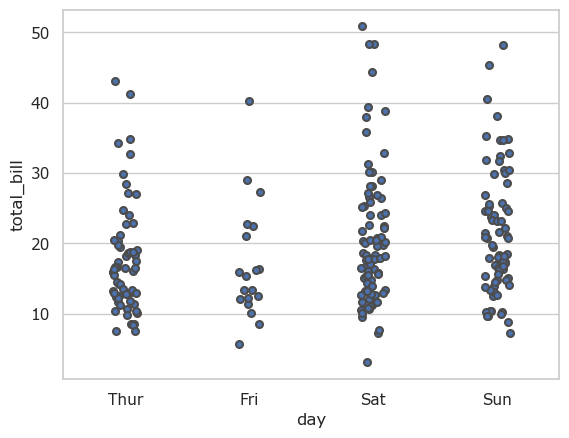

In [28]:
# jitter makes sure that data points should not get overlaped so much

sns.stripplot(data = df, x = 'day', y = 'total_bill', jitter = True, linewidth = 1.5)

In [29]:
df.groupby('day').total_bill.agg(['sum', 'max', 'min', 'median', 'std'])

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\3883153602.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').total_bill.agg(['sum', 'max', 'min', 'median', 'std'])


,sum,max,min,median,std
day,,,,,
Thur,1096.33,43.11,7.51,16.20,7.886170
Fri,325.88,40.17,5.75,15.38,8.302660
Sat,1778.40,50.81,3.07,18.24,9.480419
Sun,1627.16,48.17,7.25,19.63,8.832122


<Axes: xlabel='sex', ylabel='tip'>

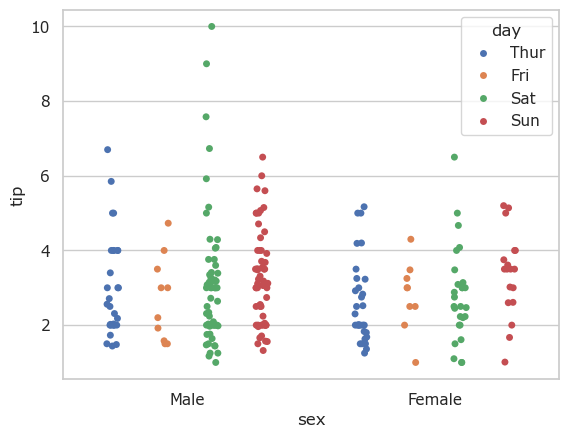

In [30]:
# dodge prevents overlapping totally for categorical values

sns.stripplot(data = df, x = 'sex', y = 'tip', hue = 'day', dodge = True)

### **Swarm Plot**

totally same as stripplot with no overlapping of a single data point


<Axes: xlabel='total_bill'>

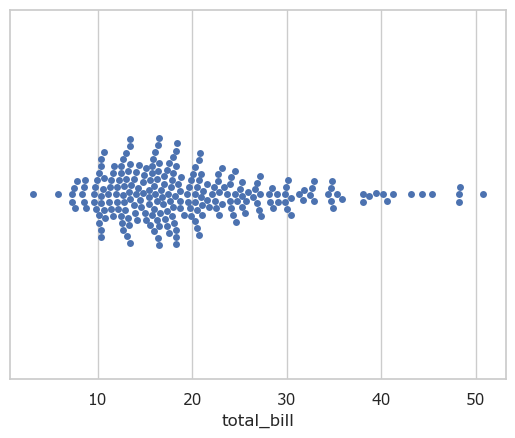

In [31]:
sns.swarmplot(data = df, x = 'total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

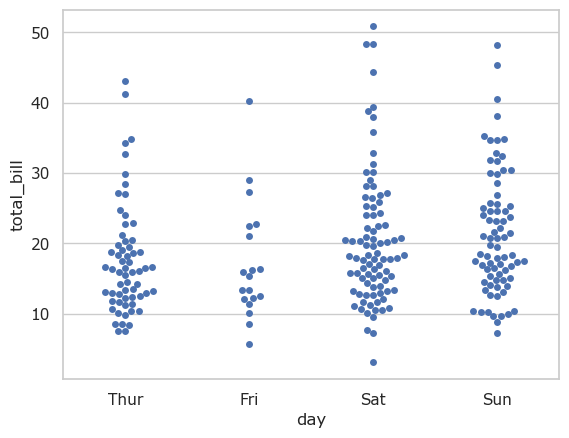

In [32]:
sns.swarmplot(data = df, x = 'day', y = 'total_bill')

### **Box Plot**

definition: a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

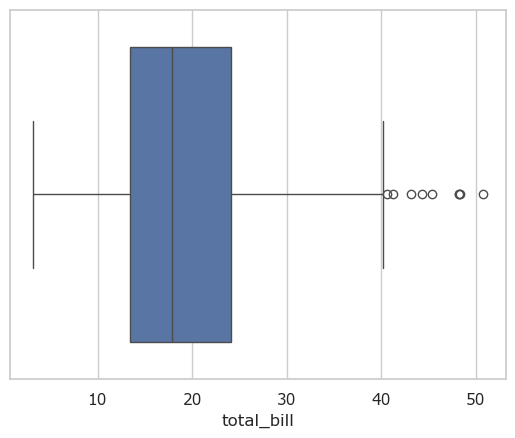

In [33]:
sns.boxplot(data = df, x = 'total_bill')
df.total_bill.describe()

In [34]:
df[(df.total_bill >= 13.347500) & (df.total_bill <= 24.127500)].shape

(122, 7)

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\622406484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').total_bill.describe()


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


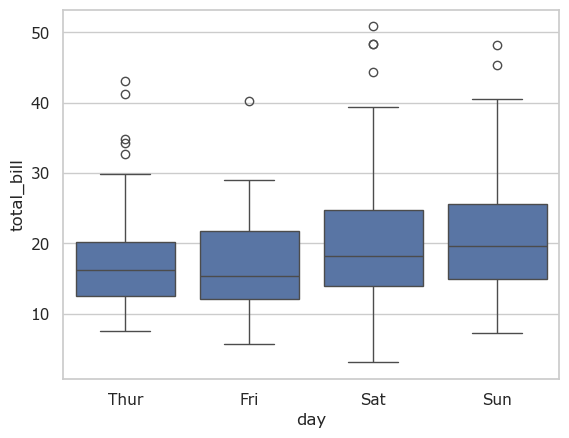

In [35]:
sns.boxplot(data = df, x = 'day', y = 'total_bill', whis = 1.5)
df.groupby('day').total_bill.describe()

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\2205411328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day', 'sex']).total_bill.describe()


count       mean        std   min      25%     50%      75%  \
day  sex                                                                   
Thur Male     30.0  18.714667   8.019728  7.51  13.6975  16.975  22.3600   
     Female   32.0  16.715312   7.759764  8.35  12.1625  13.785  18.6750   
Fri  Male     10.0  19.857000  10.015847  8.58  12.2350  17.215  26.0825   
     Female    9.0  14.145556   4.788547  5.75  11.3500  15.380  16.2700   
Sat  Male     59.0  20.802542   9.836306  7.74  13.9050  18.240  24.1650   
     Female   28.0  19.680357   8.806470  3.07  14.0500  18.360  25.5625   
Sun  Male     58.0  21.887241   9.129142  7.25  15.1350  20.725  26.5500   
     Female   18.0  19.872222   7.837513  9.60  15.1750  17.410  24.8975   

               max  
day  sex            
Thur Male    41.19  
     Female  43.11  
Fri  Male    40.17  
     Female  22.75  
Sat  Male    50.81  
     Female  44.30  
Sun  Male    48.17  
     Female  35.26

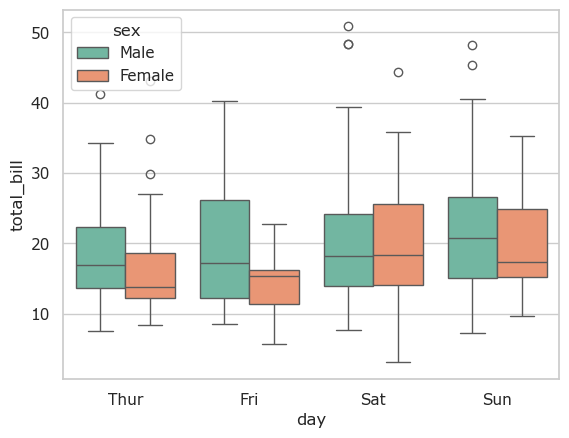

In [36]:
sns.boxplot(data = df, x = 'day', y = 'total_bill', hue = 'sex',whis = 1.5, palette = 'Set2')
df.groupby(['day', 'sex']).total_bill.describe()

### **Bar Plot**

<Axes: xlabel='day', ylabel='total_bill'>

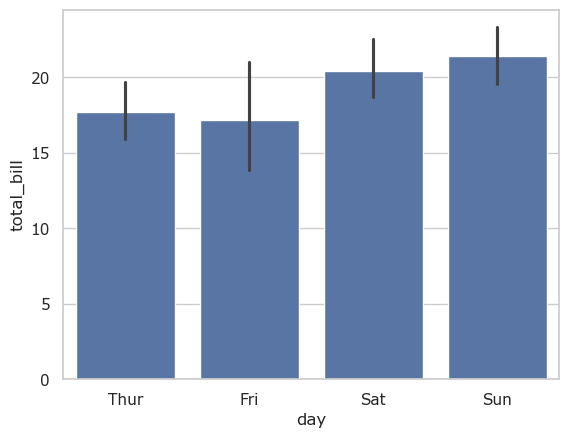

In [37]:
# on the y-axis default mean is there and u can change it with estimator parameter
sns.barplot(data = df, x = 'day', y = 'total_bill')

In [38]:
df.groupby('day').total_bill.agg(['sum', 'mean'])

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\1951020532.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').total_bill.agg(['sum', 'mean'])


,sum,mean
day,,
Thur,1096.33,17.682742
Fri,325.88,17.151579
Sat,1778.40,20.441379
Sun,1627.16,21.410000


<Axes: xlabel='day', ylabel='total_bill'>

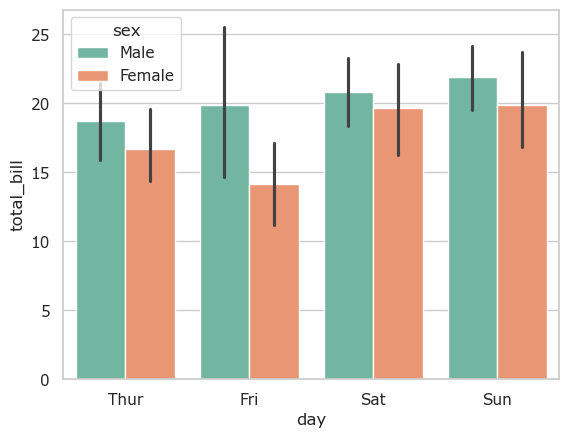

In [39]:
sns.barplot(data = df, x = 'day', y = 'total_bill', hue = 'sex', palette = 'Set2')

In [40]:
df.groupby(['day', 'sex']).total_bill.agg(['sum', 'mean'])

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\3810651622.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day', 'sex']).total_bill.agg(['sum', 'mean'])


sum       mean
day  sex                       
Thur Male     561.44  18.714667
     Female   534.89  16.715312
Fri  Male     198.57  19.857000
     Female   127.31  14.145556
Sat  Male    1227.35  20.802542
     Female   551.05  19.680357
Sun  Male    1269.46  21.887241
     Female   357.70  19.872222

<Axes: xlabel='day', ylabel='total_bill'>

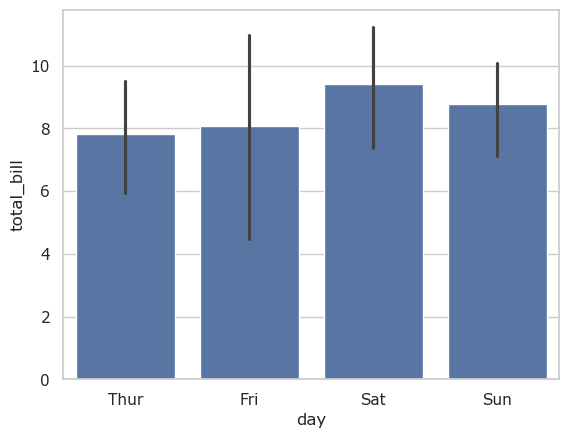

In [ ]:
from numpy import *
sns.barplot(data = df, x = 'day', y = 'total_bill', estimator = std)

# ** `ci=68` ** is the confidence interval 

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_2944\1046081695.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data = df, x = 'day', y = 'total_bill', ci = 68)


<Axes: xlabel='day', ylabel='total_bill'>

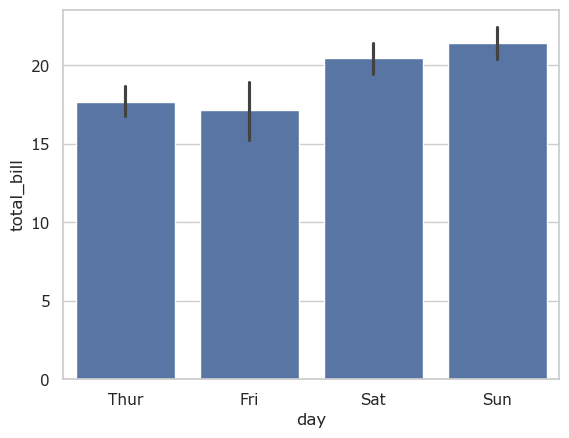

In [49]:
sns.barplot(data = df, x = 'day', y = 'total_bill', ci = 68)

In [ ]:
df.groupby(['day']).total_bill.std()

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_6924\2733966034.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day']).total_bill.std()


day
Thur    7.886170
Fri     8.302660
Sat     9.480419
Sun     8.832122
Name: total_bill, dtype: float64

<Axes: xlabel='sex', ylabel='tip'>

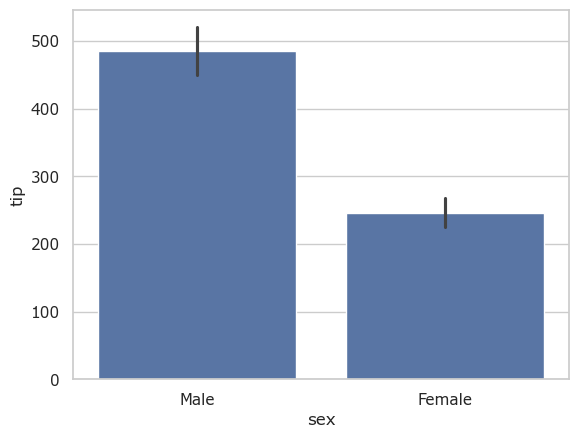

In [ ]:
sns.barplot(data = df, x = 'sex', y = 'tip', estimator = sum)

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

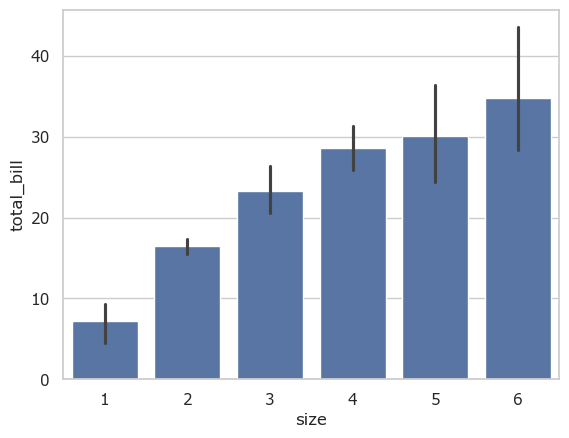

In [ ]:
sns.barplot(data = df, x = 'size', y = 'total_bill')
df.groupby('size').total_bill.mean()

In [ ]:
df['weekend'] = df.day.isin(['Sat', 'Sun'])

weekend
False    1422.21
True     3405.56
Name: total_bill, dtype: float64

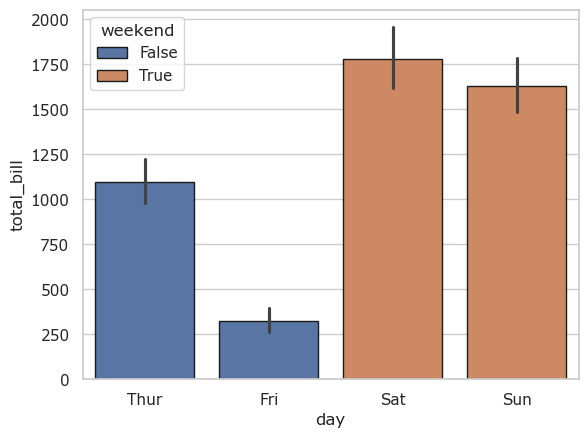

In [ ]:
sns.barplot(data = df, x= 'day', y = 'total_bill', hue = 'weekend',
            estimator = sum, edgecolor = 'k')
df.groupby('weekend').total_bill.sum()

In [ ]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Count Plot**

class
Third     491
First     216
Second    184
Name: count, dtype: int64

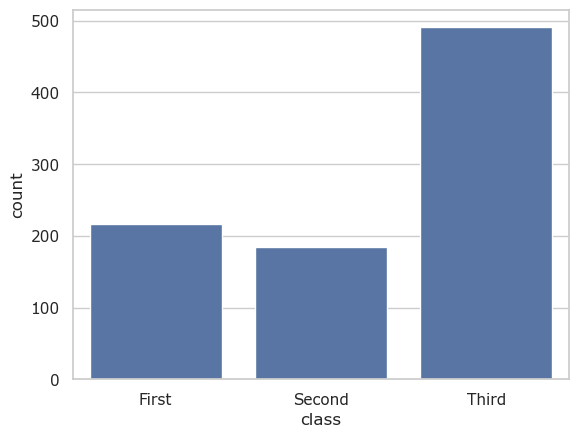

In [ ]:
sns.countplot(data = data, x ='class')
data['class'].value_counts()

class,First,Second,Third
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


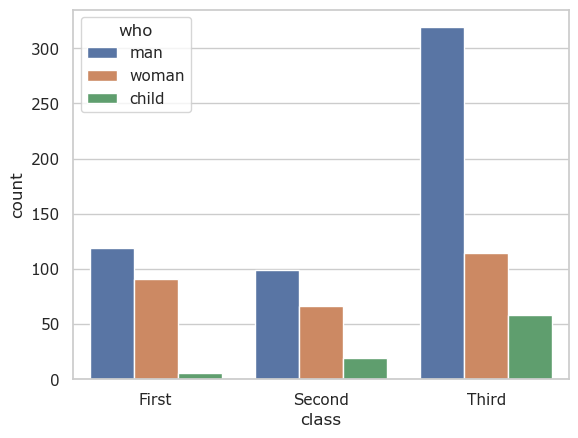

In [ ]:
sns.countplot(data = data, x ='class', hue = 'who')
data.groupby('who')['class'].value_counts().unstack()

<Axes: xlabel='class', ylabel='count'>

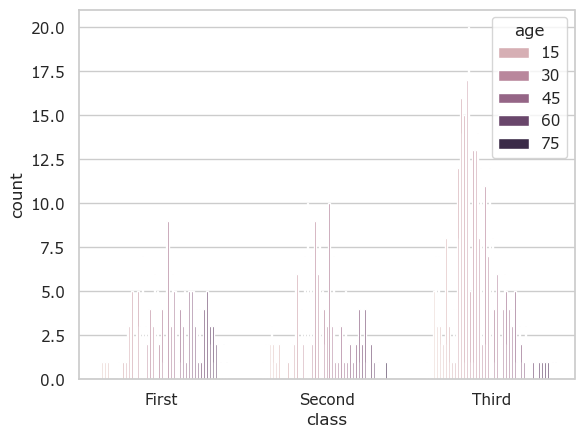

In [ ]:
sns.countplot(data = data, x ='class', hue = 'age')

## **Matrix Plot**

types:
1. heatmap
2. clustermap

### **Heatmap**

<Axes: >

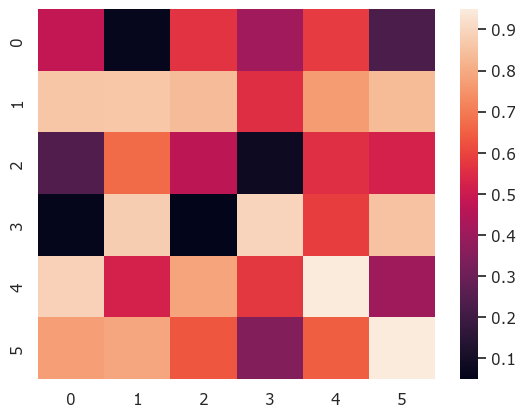

In [ ]:
sns.heatmap(np.random.rand(6, 6))

<Axes: >

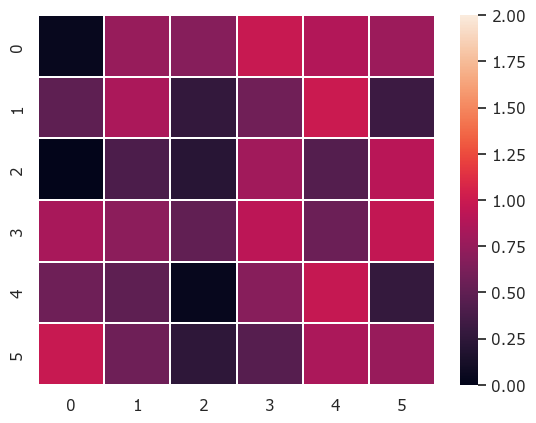

In [ ]:
# to change limits of colormap you can use vmin and vmax

sns.heatmap(np.random.rand(6, 6), vmin = 0, vmax = 2, linewidths = 0.2)

In [ ]:
data.head()    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

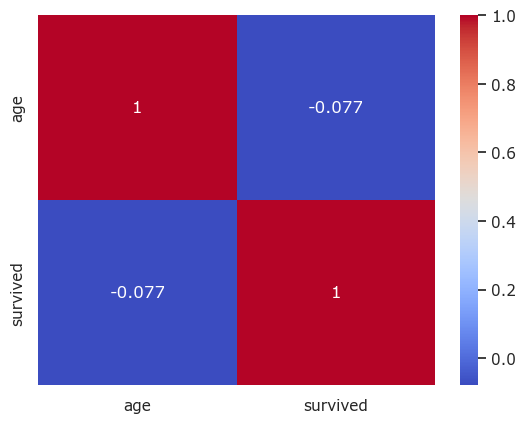

In [ ]:
sns.heatmap(data[['age','survived']].corr(),annot=True,cmap="coolwarm")          # pearsond coefficient of correlation and annot writes the coefficient

<Axes: xlabel='year', ylabel='month'>

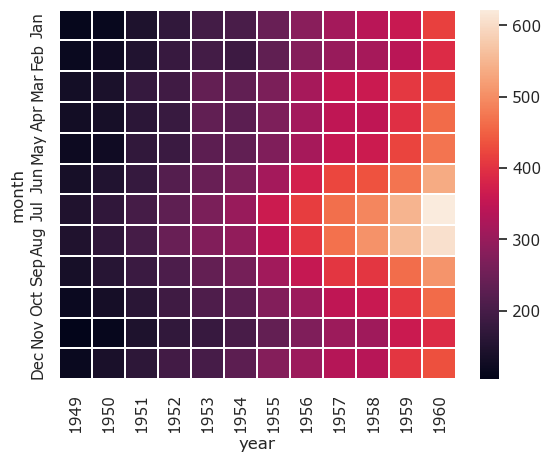

In [ ]:
data = sns.load_dataset('flights')
df1 = data.pivot(index='month', columns='year', values='passengers') 
sns.heatmap(df1, linewidths = 0.2)

<Axes: xlabel='year', ylabel='month'>

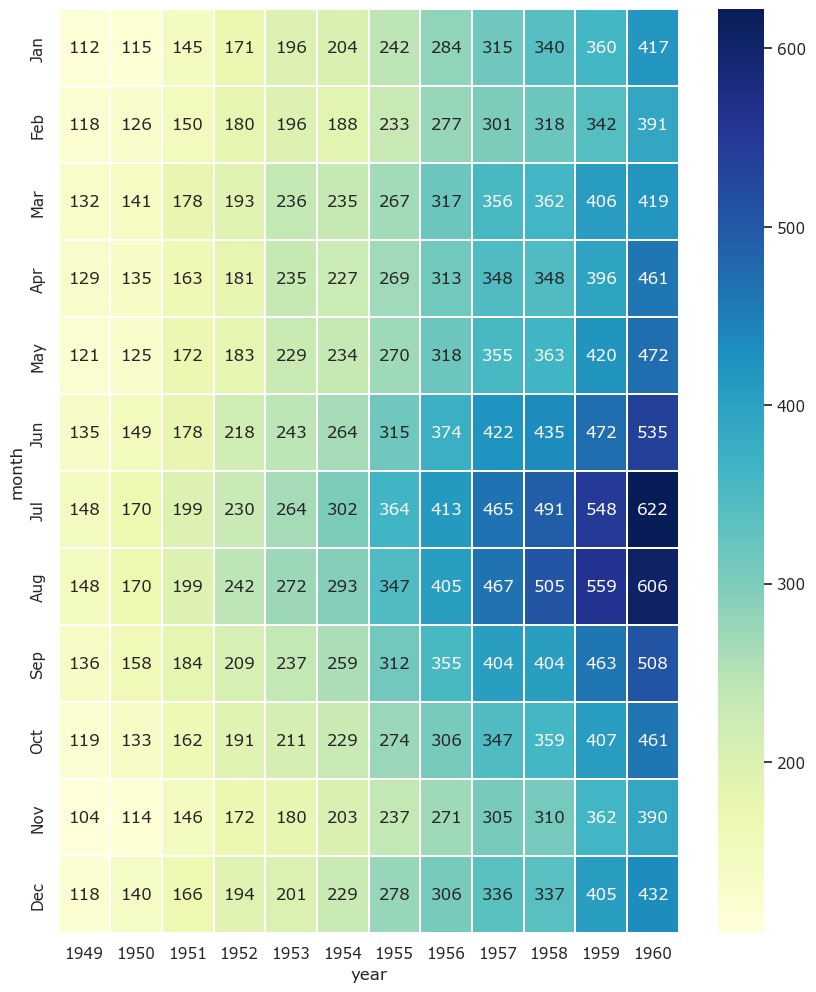

In [ ]:
# to show numerical data with heatmap we will use annot parameter
plt.figure(figsize = (10, 12))
sns.heatmap(df1, linewidths = 0.2, annot = True, fmt = 'd', cmap="YlGnBu")

### **Cluster Map**

## **Regression Plots**

In applied statistics, a partial regression plot attempts to show the effect of adding another variable to a model that already has one or more independent variables.

types:
1. lmplot
2. regplot
3. residplot

### **Reg Plot**

<Axes: xlabel='total_bill', ylabel='tip'>

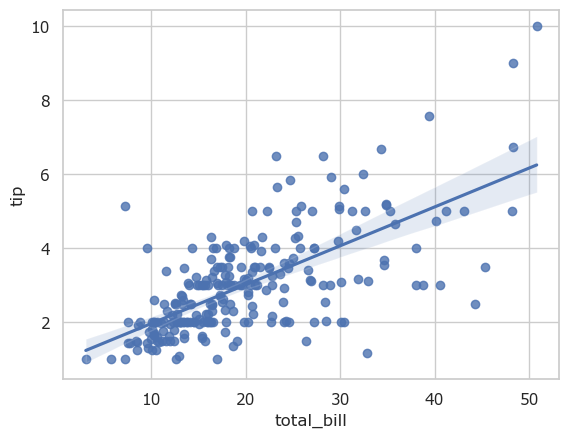

In [ ]:
sns.regplot(data = df, x = 'total_bill', y = 'tip')

<Axes: xlabel='total_bill', ylabel='tip'>

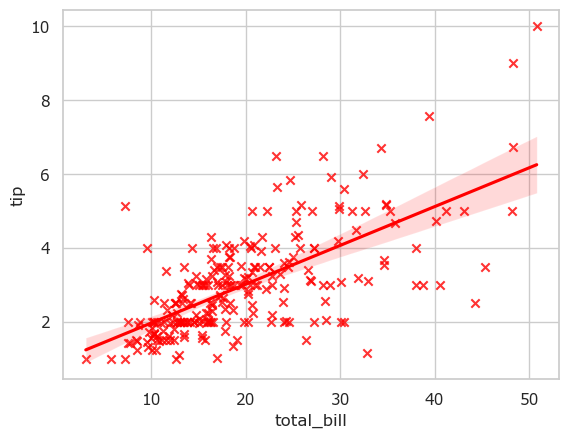

In [ ]:
sns.regplot(data = df, x = 'total_bill', y = 'tip', color = 'red', marker = 'x')

<Axes: xlabel='total_bill', ylabel='tip'>

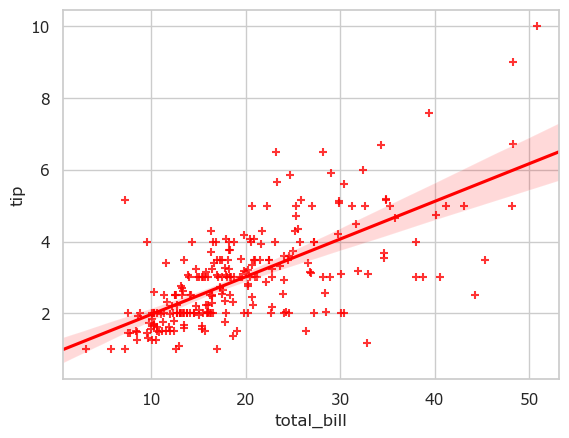

In [ ]:
sns.regplot(data = df, x = 'total_bill', y = 'tip', color = 'red', marker = '+', truncate = False)

<Axes: xlabel='size', ylabel='tip'>

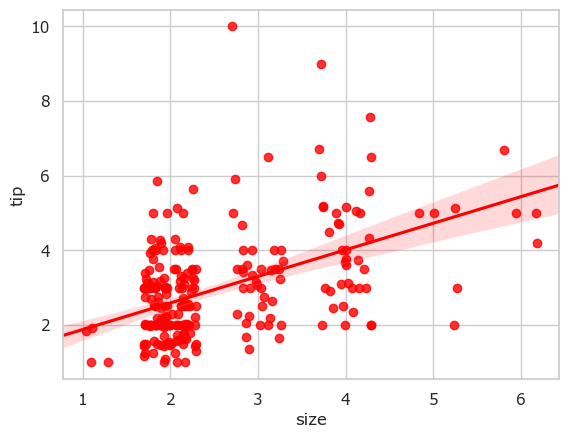

In [ ]:
sns.regplot(data = df, x = 'size', y = 'tip', color = 'red', truncate = False, x_jitter = 0.3)

<Axes: xlabel='size', ylabel='total_bill'>

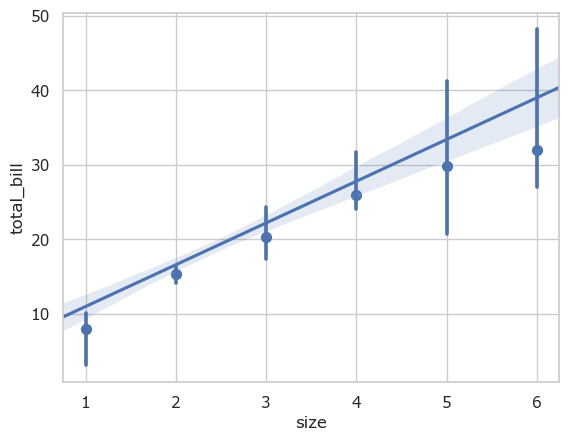

In [ ]:
sns.regplot(data = df, x = 'size', y = 'total_bill', x_estimator = np.median, truncate = False)

### **Resid Plot**

In applied statistics, a partial residual plot is a graphical technique that attempts to show the relationship between a given independent variable and the response variable given that other independent variables are also in the model.

<Axes: xlabel='total_bill', ylabel='tip'>

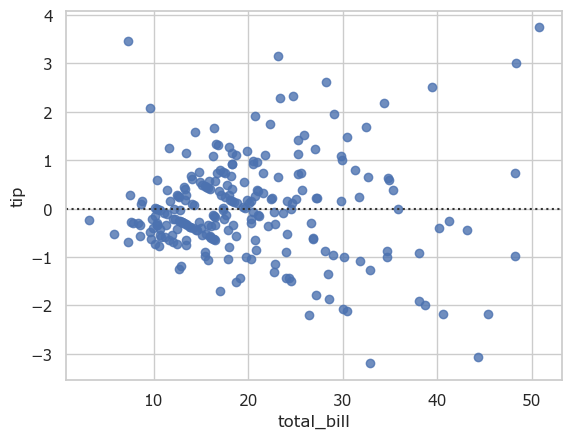

In [ ]:
sns.residplot(data = df, x = 'total_bill', y = 'tip')

### **lm Plot**

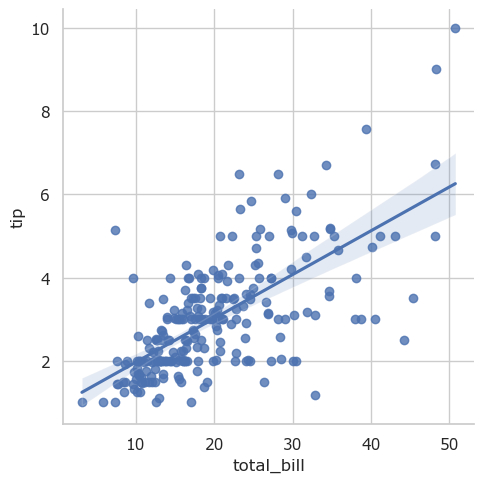

In [ ]:
sns.lmplot(data = df, x = 'total_bill', y = 'tip')

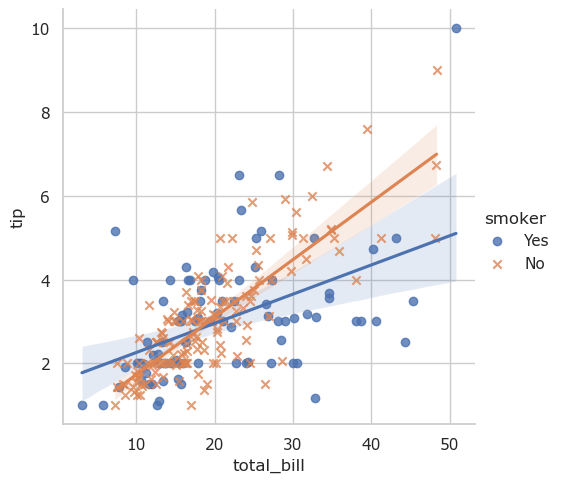

In [ ]:
sns.lmplot(data = df, x = 'total_bill', y = 'tip', hue = 'smoker', markers = ['o', 'x'])

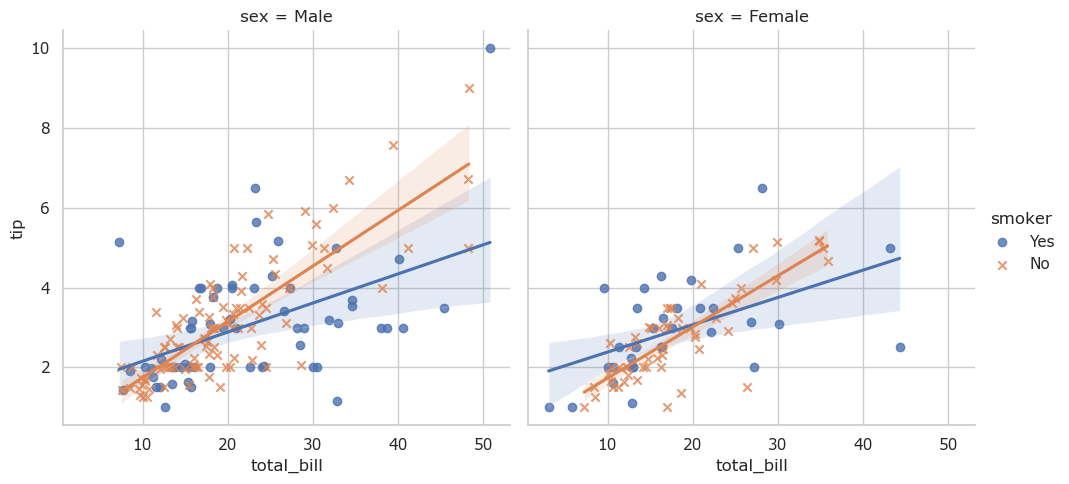

In [ ]:
sns.lmplot(data = df, x = 'total_bill', y = 'tip', hue = 'smoker', markers = ['o', 'x'], col = 'sex')

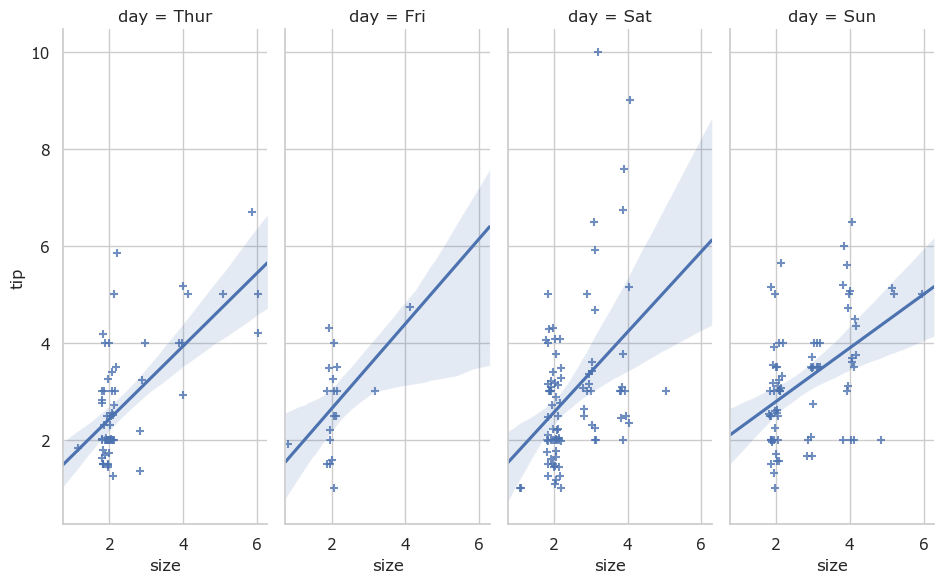

In [ ]:
sns.lmplot(data = df, x = 'size', y = 'tip', col = 'day',
           height = 6, aspect = 0.4, markers = '+', x_jitter = 0.2, truncate = False)

## **Distribution Plots**

definition: The distribution plot is suitable for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis.

types:
1. distplot
2. kdeplot
3. rugplot

### **distplot**

definition: It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_6924\2870394033.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_bill, kde = False, color = 'red', bins = 20)


<Axes: xlabel='total_bill'>

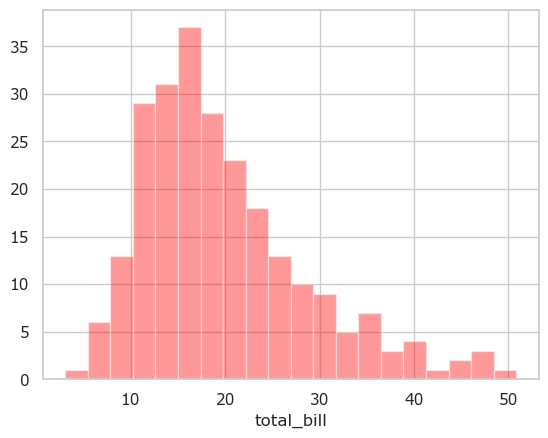

In [ ]:
# same as histogram without kde(kernal density esimation)

sns.distplot(df.total_bill, kde = False, color = 'red', bins = 20)

- KDE stands for Kernel Density Estimation and that is another kind of the plot in seaborn.
- bins is used to set the number of bins you want in your plot and it actually depends on your dataset.
- color is used to specify the color of the plot

C:\Users\AUM PATEL\AppData\Local\Temp\ipykernel_6924\260915194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_bill, rug = True, color = 'red', hist = False)


<Axes: xlabel='total_bill', ylabel='Density'>

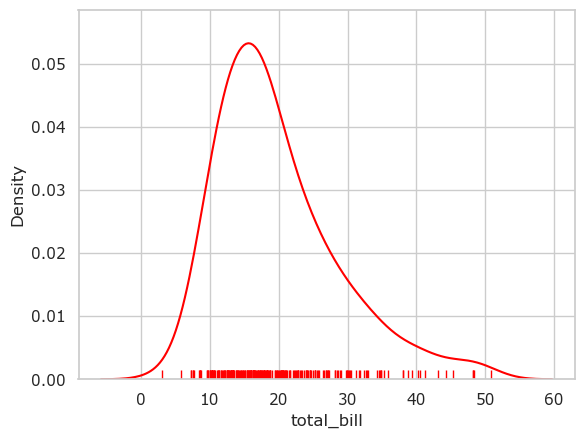

In [ ]:
sns.distplot(df.total_bill, rug = True, color = 'red', hist = False)

In [ ]:

# FacetGrid

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


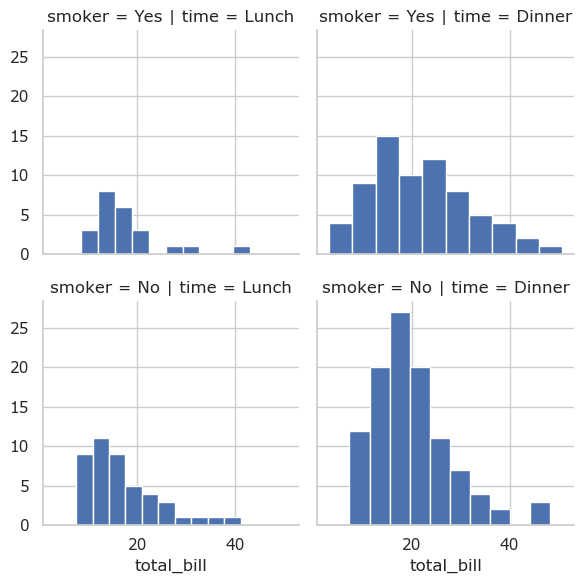

In [ ]:
sns.FacetGrid(data = df, row = 'smoker', col = 'time').map(plt.hist, 'total_bill')

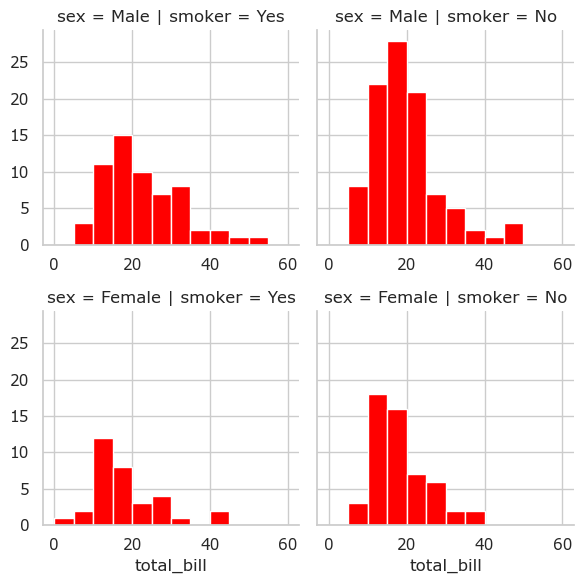

In [ ]:
bins = np.arange(0, 65, 5)
sns.FacetGrid(data = df, row = 'sex', col = 'smoker', sharex = False).map(plt.hist, 'total_bill', color = 'red', bins = bins)

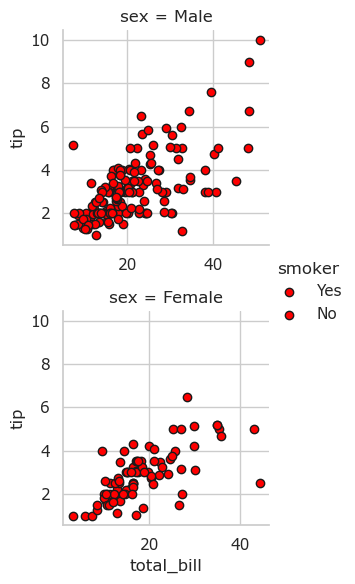

In [ ]:
(sns.FacetGrid(data = df, row = 'sex', hue = 'smoker', sharex = False).map(plt.scatter, 'total_bill', 'tip', color = 'red', edgecolor = 'k')).add_legend()

In [ ]:
# pairplot
rv = sns.load_dataset('iris')
rv.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


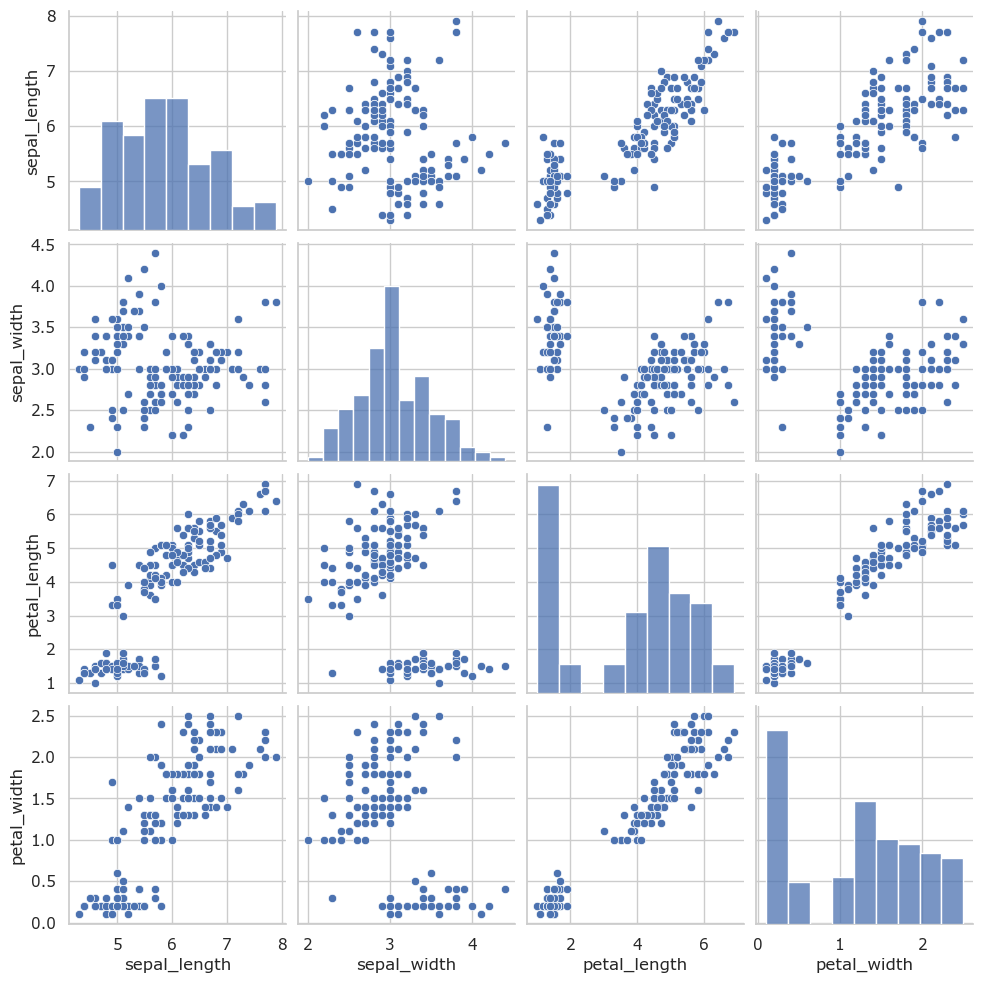

In [ ]:
sns.pairplot(rv)

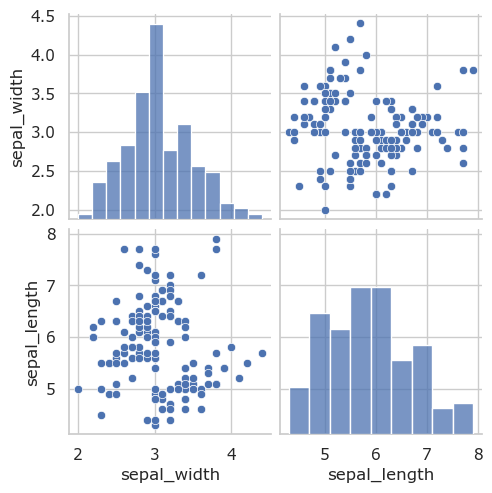

In [ ]:
sns.pairplot(rv, vars = ['sepal_width', 'sepal_length'])

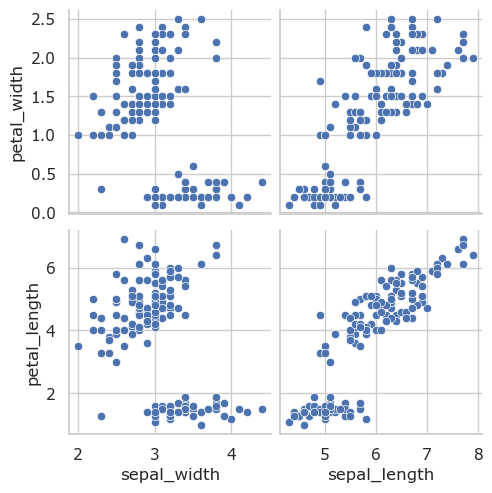

In [ ]:
sns.pairplot(rv, x_vars = ['sepal_width', 'sepal_length'], y_vars = ['petal_width', 'petal_length'])

ValueError: Filled and line art markers cannot be mixed

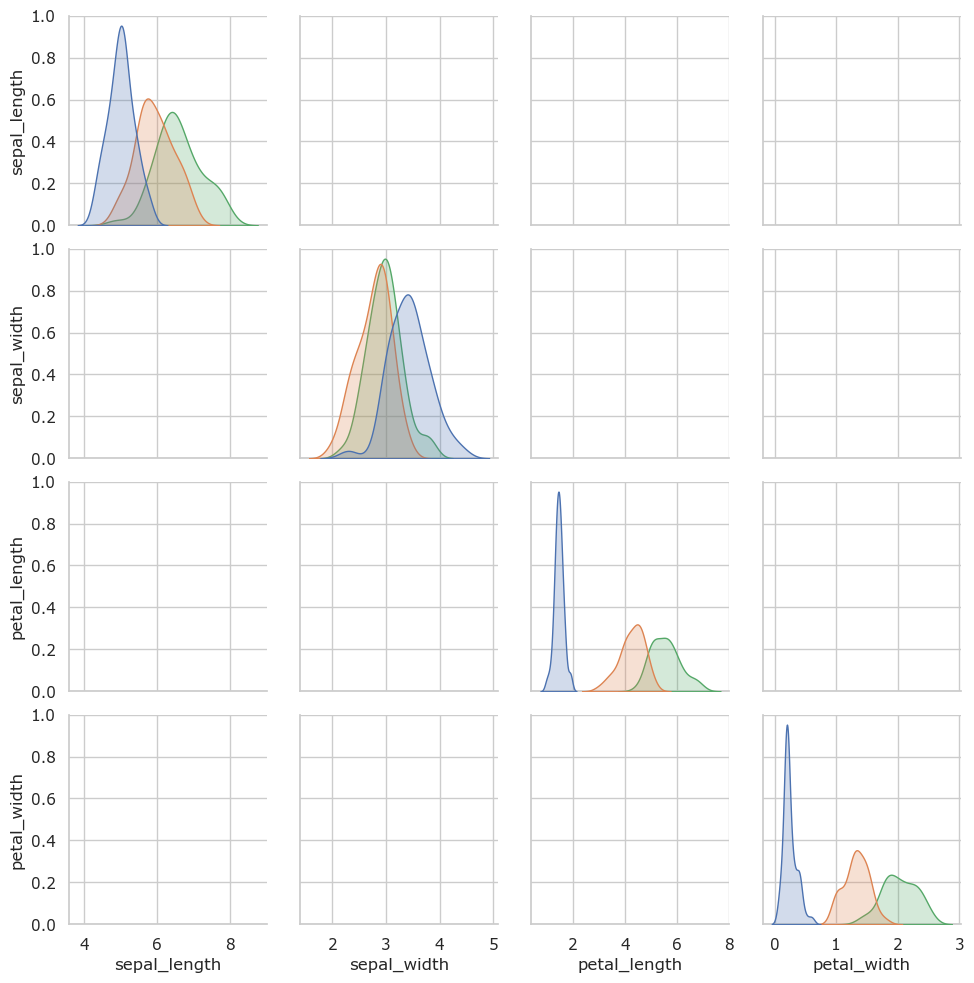

In [ ]:
sns.pairplot(rv, hue = 'species', markers = ['o', 'x', '+'])

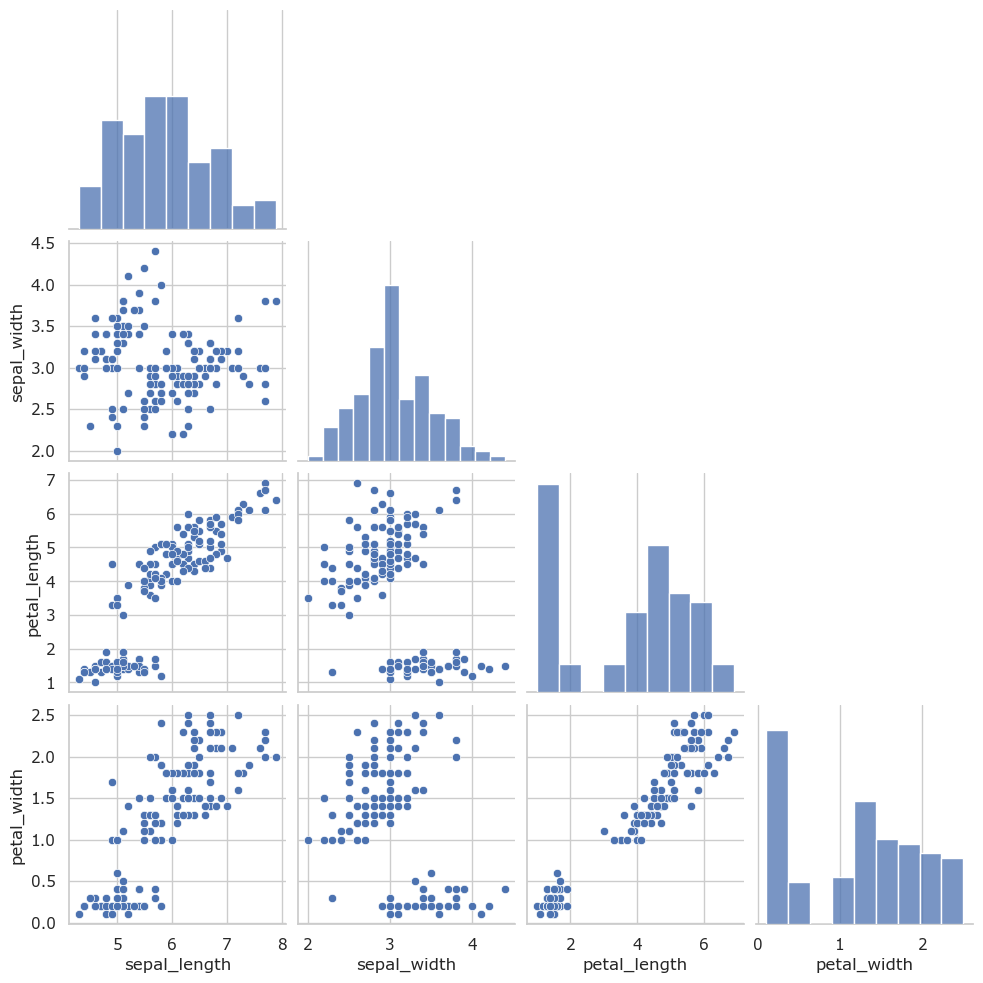

In [ ]:
sns.pairplot(rv, corner = True)

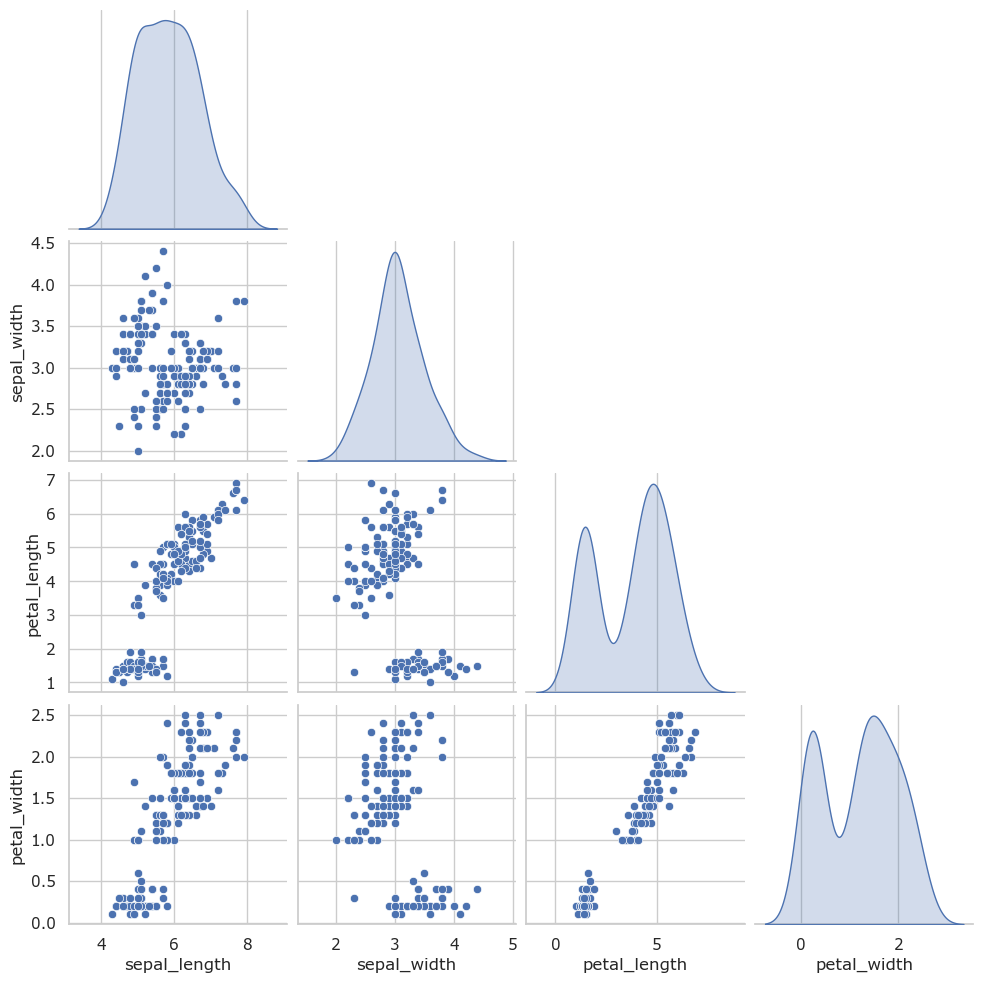

In [ ]:
sns.pairplot(rv, corner = True, diag_kind = 'kde')

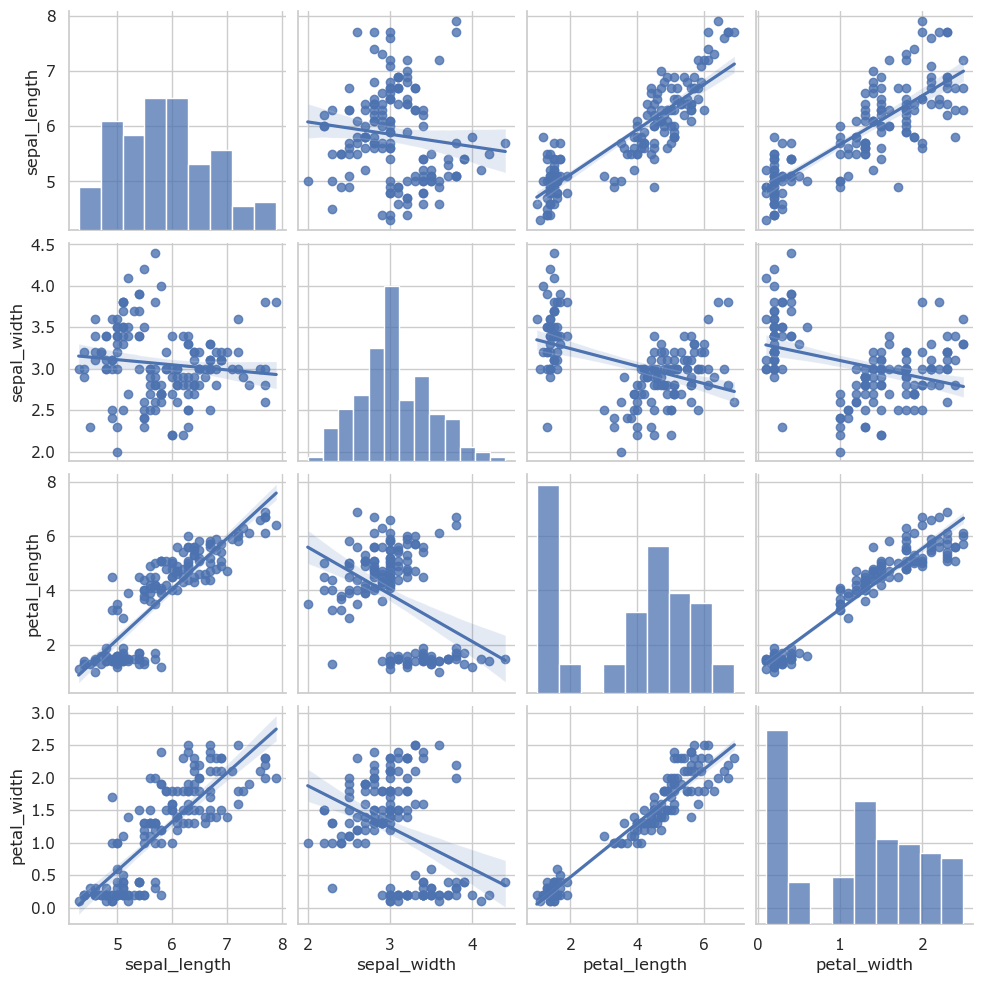

In [ ]:
sns.pairplot(rv, kind = 'reg')

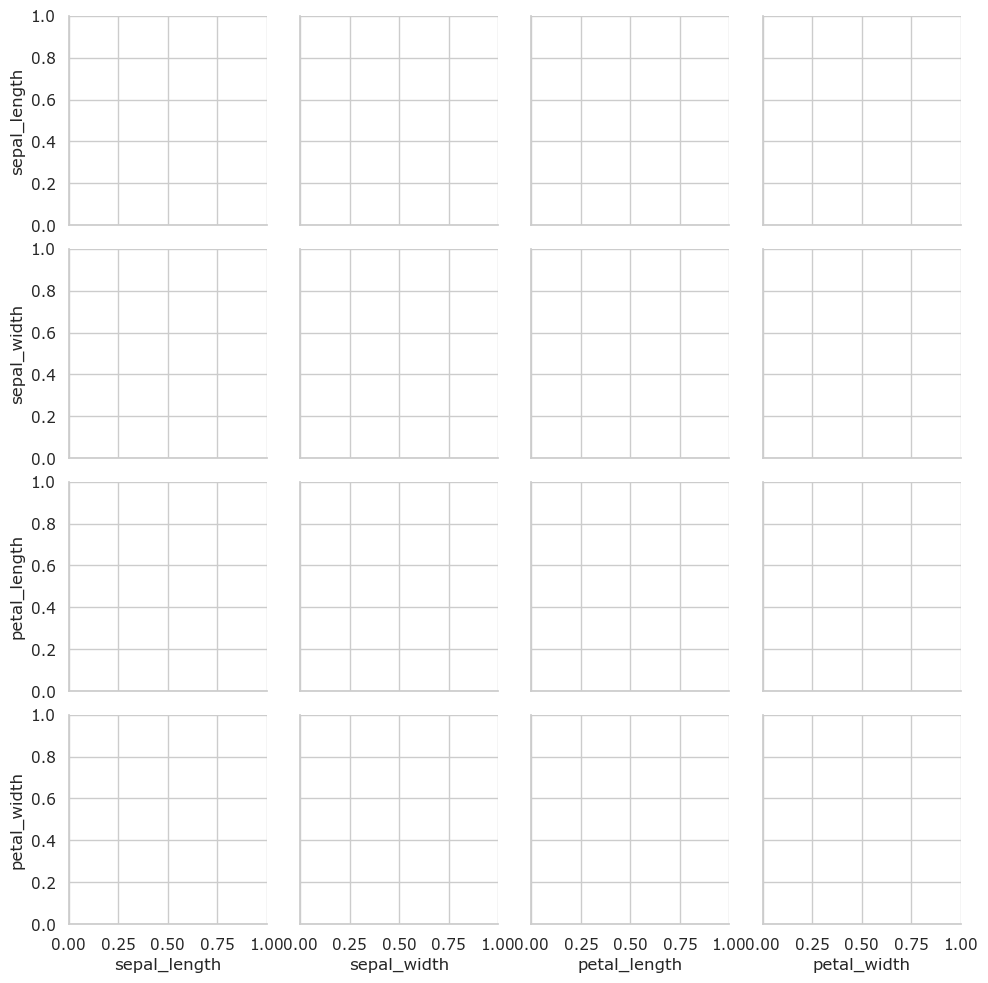

In [ ]:
sns.PairGrid(rv)

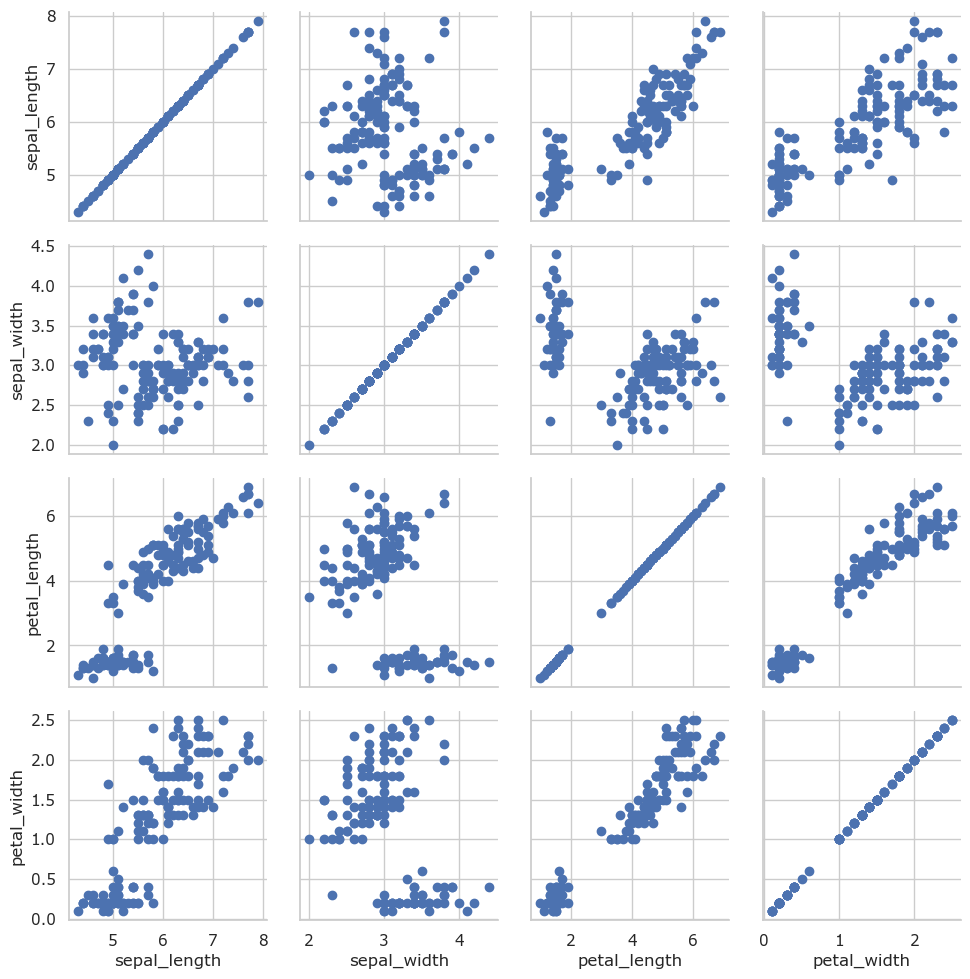

In [ ]:
sns.PairGrid(rv).map(plt.scatter)

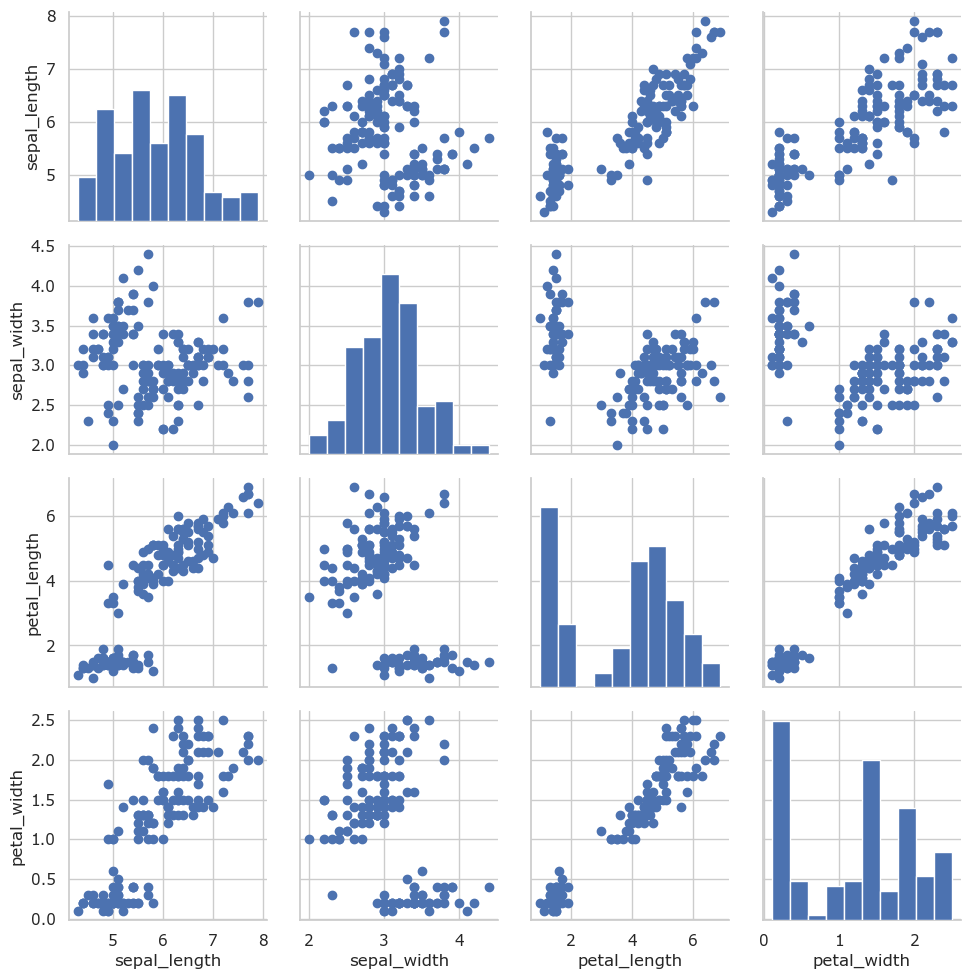

In [ ]:
sns.PairGrid(rv).map_diag(plt.hist).map_offdiag(plt.scatter)

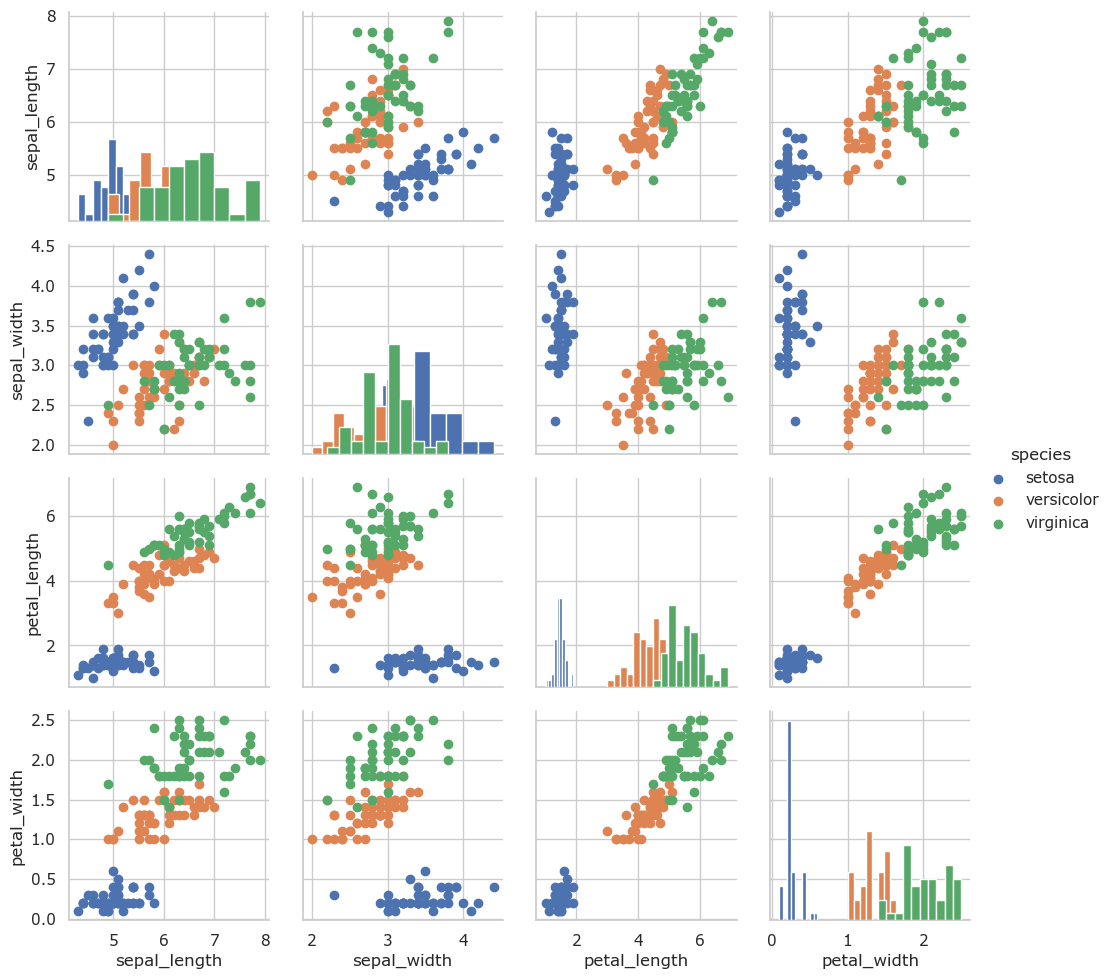

In [ ]:
sns.PairGrid(rv, hue = 'species').map_diag(plt.hist).map_offdiag(plt.scatter).add_legend()

In [ ]:
sns.PairGrid(rv).map_diag(plt.hist).map_upper(sns.scatterplot).map_lower(sns.kdeplot)

In [ ]:
# jointplot

sns.jointplot(data = df, x = 'total_bill', y = 'tip')

In [ ]:
sns.jointplot(data = df, x = 'total_bill', y = 'tip', kind = 'kde')

In [ ]:
sns.jointplot(data = df, x = 'total_bill', y = 'tip', color = 'red', kind = 'hex')

In [ ]:
sns.jointplot(data = df, x = 'total_bill', y = 'tip').plot_joint(sns.kdeplot)